In [26]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('training_data.csv')
df.head(5)

,author,description,label,publishedAt,title
0,Julia Reinstein,"Trust no man, trust no brand. (This post will ...",1,NaN,The Definitive Guide To The Best April Fools’ ...
1,Natalya Lobanova,Not that anyone should need convincing of thei...,1,NaN,Literally Just 19 Pictures That Prove Hedgehog...
2,"Kat Angus, Jane Lytvynenko","You can only have one, eh?",1,NaN,"""Would You Rather"": Canadian Food Vs. Canadian..."
3,Ben Coleman,"""It's gonna rip my eyebrow off!""",1,NaN,"Guys Try The ""Most Painful"" Face Mask"
4,Ellie Bate,"No, your hair colour won't make a difference.",1,NaN,"Which ""Riverdale"" Family Do You Belong In?"


In [3]:
print(df['title'][1])
print('-----')
print(df['description'][1])
print('Published at:', df['publishedAt'][1])

Literally Just 19 Pictures That Prove Hedgehogs Are Ridiculously Cute
-----
Not that anyone should need convincing of their cuteness, tbh.
Published at: nan


In [4]:
# Number of clickbait and non-clickbait articles
df['label'].value_counts()

0    808
1    557
Name: label, dtype: int64

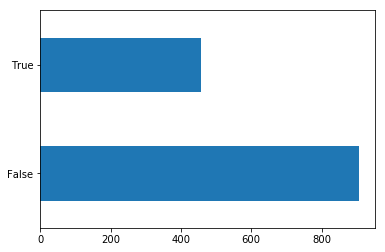

In [5]:
# Plotting the number of author fields that are Null
df['author'].isnull().value_counts().plot('barh')

In [6]:
# The number of characters in the description field
df['description'].apply(len).mean()

85.32307692307693

In [7]:
# Comparing the number of description characters in clickbait to news
df['description'].apply(len).groupby(df['label']).mean()

label
0    111.623762
1     47.170557
Name: description, dtype: float64

In [8]:
# TEST YOUR KNOWLEDGE
# Can you write a one-liner to compute the number of clickbait articles
# written by each author? Hint: you might find the .sum() function helpful!
df['full_content'] = df.description + ' ' + df.title
df.head(1)

,author,description,label,publishedAt,title,full_content
0,Julia Reinstein,"Trust no man, trust no brand. (This post will ...",1,NaN,The Definitive Guide To The Best April Fools’ ...,"Trust no man, trust no brand. (This post will ..."


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [10]:
sentence = ["Literally just 8 really really cute dogs"]
vectorizer.fit(sentence)
print(vectorizer.vocabulary_) # dictionary of words and ids

{'really': 4, 'just': 2, 'literally': 3, 'dogs': 1, 'cute': 0}


In [11]:
vectorizer.transform(sentence).toarray()

array([[1, 1, 1, 1, 2]])

In [12]:
sentence = ["OMG 5 truly hilarious dogs 😂"]
vectorizer.transform(sentence).toarray()

array([[0, 1, 0, 0, 0]])

In [19]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

In [20]:
bag_of_words = [
    [1, 5], [1, 4], [2, 6], [4, 2], [3, 4], [2, 1]
]
labels = [1, 1, 1, 0, 0, 0]

In [1]:
from utils import plot_2d_samples
plot_2d_samples(bag_of_words, labels)

ImportError: cannot import name 'plot_2d_samples'

In [ ]:
svc = svc.fit(bag_of_words, labels)

In [ ]:
from utils.plotting import plot_2d_trained_svc
plot_2d_trained_svc(bag_of_words, labels, svc)

In [ ]:
svc.predict([[3, 1], [2,4]])

In [ ]:
steps = (
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC())
)

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

In [ ]:
from sklearn.cross_validation import train_test_split
training, testing = train_test_split(
    df,                # The dataset we want to split
    train_size=0.7,    # The proportional size of our training set
    stratify=df.label, # The labels are used for stratification
    random_state=400   # Use the same random state for reproducibility
)

In [ ]:
training.head(5)

In [ ]:
print(len(training))
print(len(testing))

In [ ]:
pipeline = pipeline.fit(training.title, training.label)

In [ ]:
pipeline.predict(["10 things you need to do..."])

In [ ]:
pipeline.predict(["French election polls show an early lead for Macron."])

In [ ]:
import matplotlib.pyplot as plt
plt.close('all')
plt.subplot(1,3,3)

from utils.plotting import print_top_features
print_top_features(pipeline, n_features=10)

In [ ]:
from sklearn.cross_validation import cross_val_predict
predicted_labels = cross_val_predict(pipeline, training.title, training.label)

In [ ]:
from utils.plotting import pipeline_performance
pipeline_performance(training.label, predicted_labels)

In [ ]:
training[training.label != predicted_labels]

In [ ]:
predicted_labels = cross_val_predict(pipeline, training.full_content, training.label)
pipeline_performance(training.label, predicted_labels)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

steps = (
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
)
pipeline = Pipeline(steps)

predicted_labels = cross_val_predict(pipeline, training.full_content, training.label)
pipeline_performance(training.label, predicted_labels)

In [ ]:
import re
def mask_integers(s):
    return re.sub(r'\d+', 'INTMASK', s)

steps = (
    ('vectorizer', TfidfVectorizer(preprocessor=mask_integers)),
    ('classifier', LinearSVC())
)
pipeline = Pipeline(steps)

predicted_labels = cross_val_predict(pipeline, training.full_content, training.label)
pipeline_performance(training.label, predicted_labels)

In [ ]:
steps = (
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
)

pipeline = Pipeline(steps)

In [ ]:
gs_params = {
    'vectorizer__stop_words': ['english', None],
    'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'vectorizer__preprocessor': [mask_integers, None],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(pipeline, gs_params, n_jobs=-1)
gs.fit(training.full_content, training.label)

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

In [ ]:
pipeline = gs.best_estimator_
predicted_labels = pipeline.predict(testing.full_content)
pipeline_performance(testing.label, predicted_labels)

In [ ]:
filename = 'classifiers/clickbait_svc_v1'

In [ ]:
# import pickle
# with open(filename, 'wb') as f:
#     pickle.dump(pipeline, f)